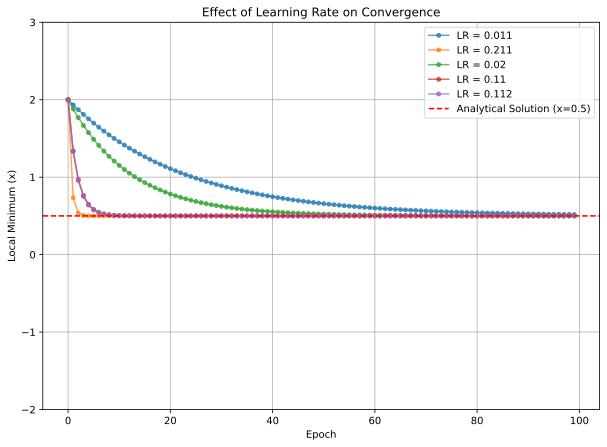

In [1]:
# import all necessary modules
import numpy as np
import matplotlib.pyplot as plt

import matplotlib_inline.backend_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('svg')

# function (as a function)
def f(x):
  return 2*x**2 - 2*x + 3

# derivative function
def df(x):
  return 4*x - 2

# --- Task 1: Experiment with Learning Rates ---

# Define parameters
# We'll test a range of learning rates
learning_rates = [0.011, 0.211, 0.02, 0.11, 0.112]
training_epochs = 100
start_point = 2.0         # Use a fixed starting point for a fair comparison
analytical_solution = 0.5

plt.figure(figsize=(10, 7))

# Loop over each learning rate
for lr in learning_rates:
    localmin = start_point
    trajectory = [] # Store the value of localmin at each epoch
    
    # Run gradient descent
    for epoch in range(training_epochs):
        trajectory.append(localmin) # Store current position
        grad = df(localmin)         # Compute gradient
        localmin = localmin - lr * grad # Update position
    
    # Plot the trajectory for this learning rate
    plt.plot(trajectory, 'o-', label=f'LR = {lr}', alpha=0.7, markersize=4)

# Plot the true analytical solution as a dashed line
plt.axhline(y=analytical_solution, color='r', linestyle='--', label='Analytical Solution (x=0.5)')

# Add plot details
plt.title('Effect of Learning Rate on Convergence')
plt.xlabel('Epoch')
plt.ylabel('Local Minimum (x)')
plt.legend()
plt.grid(True)
plt.ylim(-2, 3) # Set y-limits to better see oscillations and explosions
plt.show()